# Exploring Weather Trends

Created By: Xi Luo

## Overview

The project expolores the trend of global temperature average and New York City temperture average.

Original Dataset Used:
*   city_list
*   global_data
*   city_data

Dataframes Used:
*   global_data
*   nyc_temp



I use pandas libaries, sql to generate moving agerage.

Then I use pandas.plot.line to plot the trend.

Moving Average = sum of temperture over 15 years / 15
First, I use the index for each row to divide by 15 and round it to an integer.
Second, I use function groupby to group all the indices with the same number.
Third, I use mean function to aggreate all avg_temp values.

When visualize the trends, I consider variable x and y, xticks, and figure size.

##Procedure

###Extract New York City Temperature

In [ ]:
select * from city_data
where city = 'New York'

In [ ]:
select * from global_data

In [ ]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
global_id = '1l0Qv6DT48N4JnjG0_izdKgU69__bv0gP'
nyc_id = '1cY7I3dZ0e3zwn972Vjh7xMJR6w_h6Okh'

In [ ]:
downloaded1 = drive.CreateFile({'id':global_id}) 
downloaded1.GetContentFile('global_data.csv')  
global_data = pd.read_csv('global_data.csv')

In [ ]:
global_data.head(5)






,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [ ]:
downloaded2 = drive.CreateFile({'id':nyc_id}) 
downloaded2.GetContentFile('nyc_temp.csv')  
nyc_temp = pd.read_csv('nyc_temp.csv')

In [ ]:
nyc_temp.head(5)

,year,city,country,avg_temp
0,1743,New York,United States,3.26
1,1744,New York,United States,11.66
2,1745,New York,United States,1.13
3,1746,New York,United States,NaN
4,1747,New York,United States,NaN


### Global Moving Average (every 15 years)

In [ ]:
global_15 = global_data.groupby(global_data.index//15).mean()

Text(0, 0.5, 'global average temperture/ ℃')

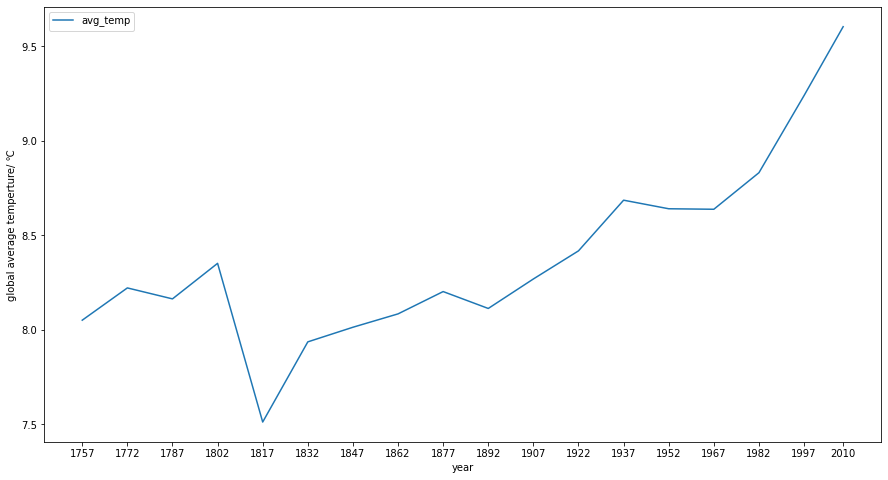

In [ ]:
global_trend = global_15.plot.line(x='year', y='avg_temp',figsize=(15,8),xticks=global_15['year'])
global_trend.set_ylabel("global average temperture/ ℃")

###Average Global Temperature (1950-2010):

In [ ]:
global_data[(global_data.year > 1749) & (global_data.year < 2011)].agg({'avg_temp': ['mean']})





,avg_temp
mean,8.345747


### Moving Average for New York City (every 15 years)

In [ ]:
nyc_15 = nyc_temp.groupby(nyc_temp.index//15).mean()

Text(0, 0.5, 'NYC average temperture / ℃')

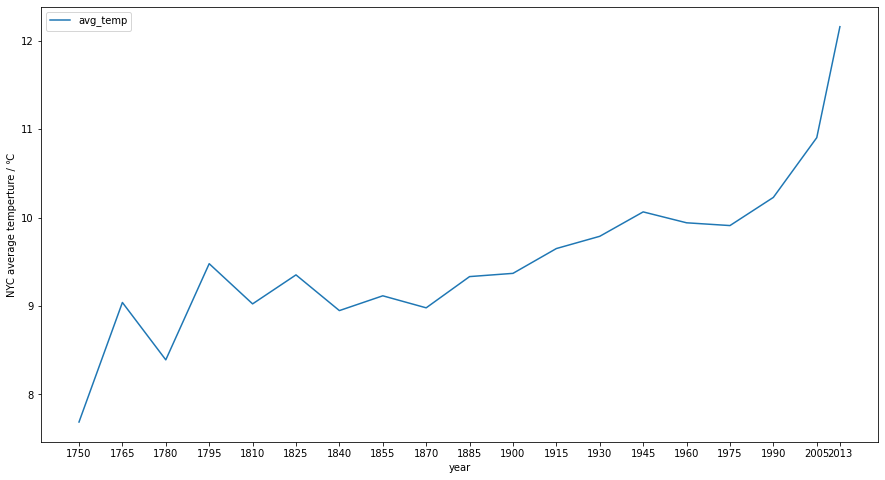

In [ ]:
nyc_trend = nyc_15.plot.line(x='year', y='avg_temp',figsize=(15,8),xticks=nyc_15['year'])
nyc_trend.set_ylabel("NYC average temperture / ℃")

###Average Tempreture of New York City (1950-2010)

In [ ]:
nyc_temp[(nyc_temp.year > 1749) & (nyc_temp.year < 2011)].agg({'avg_temp': ['mean']}) 

,avg_temp
mean,9.460192


### Comparison

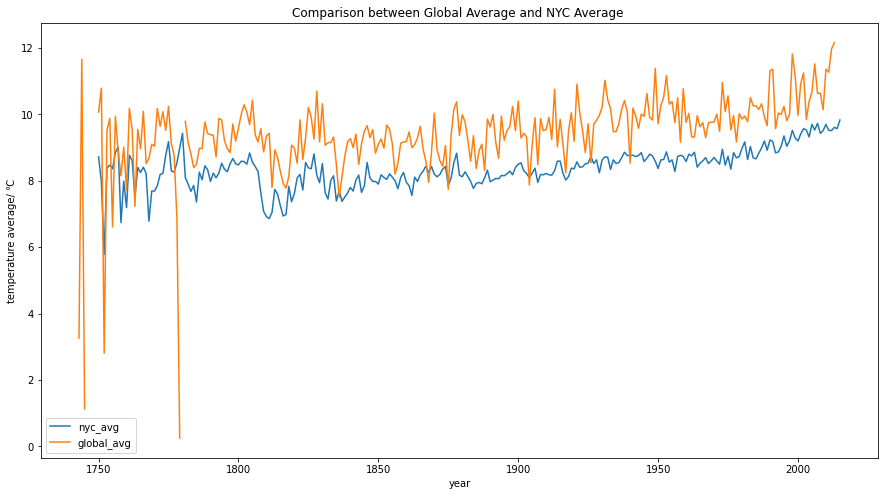

In [ ]:
ax = global_data.plot(x='year', y='avg_temp')
nyc_temp.plot(ax=ax, x='year', y='avg_temp',figsize=(15,8),title="Comparison between Global Average and NYC Average ")
ax.set_ylabel("temperature average/ ℃")
ax.legend(["nyc_avg", "global_avg"])




















##Oberservations
1. The world has been getting hotter over the the last few hundred years
2. New York City has been getting hotter over the last few hundred years.
3. The average New York City temperature from 1950 - 2010 is 1 degree Celsius higher than the average of global tempreture.
4. The global average around 1817 has a significant drop and is the lowest over the fast hundred years.In contrast, New York City is warmer than the global average.
5.  Before 1975, New York City average increased smoothly. Since then, it increased exponentially.
6. The global average started to increase rapidly around 1922, which is 53 years earlier than New York City.
7. New York City average has a more stable trend than the global as there is no big drop in the graph.